In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

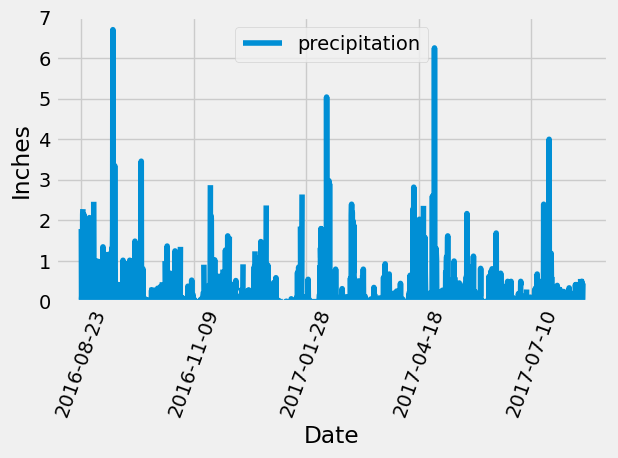

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
query_date = last_date - dt.timedelta(days=365)
query_date

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, measurement.prcp]
results = session.query(*sel).filter(measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

prcp = [(result.date,result.prcp) for result in results]
prcp_df = pd.DataFrame(prcp, columns=['date', 'precipitation']).set_index("date")
prcp_df
# Sort the dataframe by date
sorted_prcp_df = prcp_df.sort_values(by = "date")
sorted_prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_df.plot()

plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()



In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(measurement.station, func.count(measurement.station)).\
                group_by(measurement.station).\
                order_by (func.count(measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station = station_count[0][0]

session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
        filter(measurement.station == top_station).all()

[(54.0, 85.0, 71.66378066378067)]

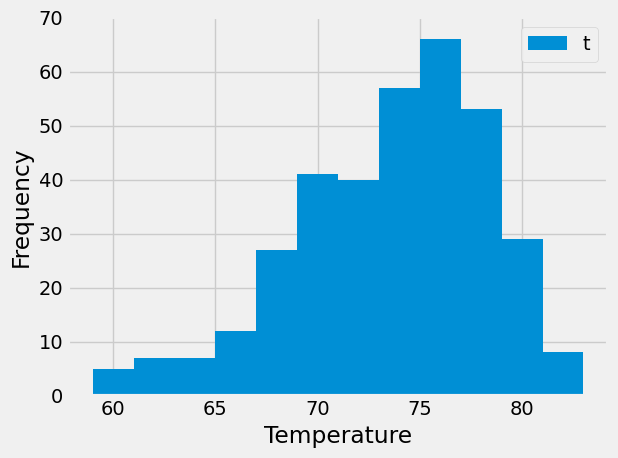

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_date = last_date - dt.timedelta(days=365)
query_date

#retreval of temp query
sel = [measurement.date, measurement.tobs]
results = session.query(*sel).filter(measurement.date >= query_date).filter(measurement.station == top_station).all()

#saving query to dataframe
temp = [(result.date,result.tobs) for result in results]
temp_df = pd.DataFrame(temp, columns=['date', 'tobs']).set_index("date")
temp_df

#plot 
plt.hist(temp_df['tobs'],bins = 12)
plt.ylim(0,70)
plt.legend('tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Close Session

In [24]:
# Close Session
session.close()